In [3]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)

from torch.nn.functional import cross_entropy
import matplotlib.pyplot as plt

from tictactoe.game import *
from tictactoe.data import *
from tictactoe.evals import *

In [4]:
# tictactoe_data = calculate_tictactoe_data()
path = os.path.abspath(
    os.path.join(os.getcwd(), "..", "..", "data", "tictactoe", "tictactoe_data.pkl")
)
tictactoe_data = cache_tictactoe_data(path)

print(tictactoe_data.games_data.shape)
print(tictactoe_data.random_move_labels.shape)
print(tictactoe_data.weak_goals_labels.shape)
print(tictactoe_data.strong_goals_labels.shape)

torch.Size([255168, 10])
torch.Size([255168, 10, 10])
torch.Size([255168, 10, 10])
torch.Size([255168, 10, 10])


In [5]:
print(cross_entropy(tictactoe_data.weak_goals_labels, tictactoe_data.weak_goals_labels))

tensor(1.8366)


In [6]:
loss_fn = cross_entropy
print("Random")
print(evaluate_predictions(tictactoe_data.random_move_labels, tictactoe_data, loss_fn))
print("Weak")
print(evaluate_predictions(tictactoe_data.weak_goals_labels, tictactoe_data, loss_fn))
print("Strong")
print(evaluate_predictions(tictactoe_data.strong_goals_labels, tictactoe_data, loss_fn))

Random


{'weak_loss': 2.0989816188812256, 'strong_loss': 2.089287519454956, 'weak_accuracy': 0.6751543879508972, 'strong_accuracy': 0.6257853507995605, 'illegal_move_chance': 0.0}
Weak
{'weak_loss': 1.8365529775619507, 'strong_loss': 2.142681837081909, 'weak_accuracy': 1.0, 'strong_accuracy': 0.46669408679008484, 'illegal_move_chance': 0.0}
Strong
{'weak_loss': 2.150684356689453, 'strong_loss': 1.7301105260849, 'weak_accuracy': 0.5263152122497559, 'strong_accuracy': 1.0, 'illegal_move_chance': 0.0}


In [7]:
def log_generating_game_wandb(model):
    samples = evals.sample_games(model, 1, 100)
    evaluation = evals.eval_model(samples)
    res = {}
    for metric, value in evaluation.items():
        res["generative/" + metric] = value
    wandb.log(res)

In [8]:
# tictactoe_data = calculate_tictactoe_data()
path = os.path.abspath(
    os.path.join(os.getcwd(), "..", "..", "data", "tictactoe", "tictactoe_data.pkl")
)
tictactoe_data = cache_tictactoe_data(path)

print(tictactoe_data.games_data.shape)
print(tictactoe_data.random_move_labels.shape)
print(tictactoe_data.weak_goals_labels.shape)
print(tictactoe_data.strong_goals_labels.shape)

torch.Size([255168, 10])
torch.Size([255168, 10, 10])
torch.Size([255168, 10, 10])
torch.Size([255168, 10, 10])


In [9]:
game_1 = tictactoe_data.games_data[0]
Board(game_1).replay()


After move 0 (move: 0):
| X |   |   |
|   |   |   |
|   |   |   |

After move 1 (move: 1):
| X | O |   |
|   |   |   |
|   |   |   |

After move 2 (move: 3):
| X | O |   |
| X |   |   |
|   |   |   |

After move 3 (move: 2):
| X | O | O |
| X |   |   |
|   |   |   |

After move 4 (move: 6):
| X | O | O |
| X |   |   |
| X |   |   |


[0.0, 0.08749999850988388, 0.022843509912490845, 0.0833333283662796, 0.04066978022456169, 0.07457675039768219, 0.0385628305375576, 0.03927765414118767, 0.0, 0.0]


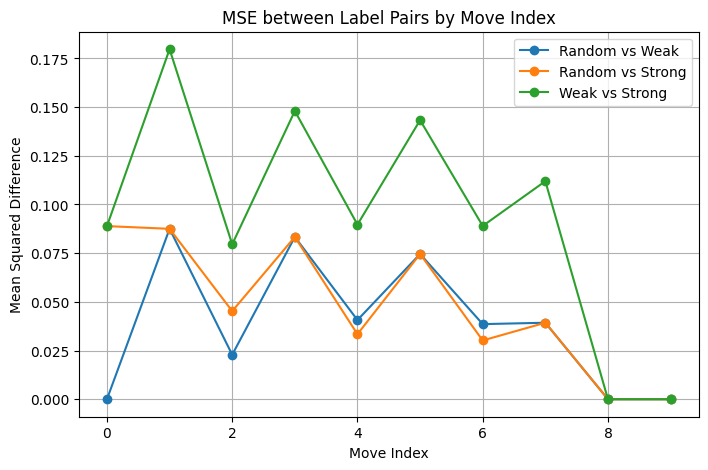

In [10]:
# Compute the mean squared error (MSE) for each move index (0 to 9)
move_indices = range(10)

mse_random_vs_weak = []
mse_random_vs_strong = []
mse_weak_vs_strong = []

for move in move_indices:
    # Extract the label vectors for all games at this move index (shape: [n_games, 9])
    random_labels = tictactoe_data.random_move_labels[:, move, :]
    weak_labels = tictactoe_data.weak_goals_labels[:, move, :]
    strong_labels = tictactoe_data.strong_goals_labels[:, move, :]

    # Compute MSE between random and weak labels
    mse_rw = ((random_labels - weak_labels) ** 2).mean().item()
    mse_random_vs_weak.append(mse_rw)

    # Compute MSE between random and strong labels
    mse_rs = ((random_labels - strong_labels) ** 2).mean().item()
    mse_random_vs_strong.append(mse_rs)

    # Compute MSE between weak and strong labels
    mse_ws = ((weak_labels - strong_labels) ** 2).mean().item()
    mse_weak_vs_strong.append(mse_ws)

print(mse_random_vs_weak)

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(move_indices, mse_random_vs_weak, marker="o", label="Random vs Weak")
plt.plot(move_indices, mse_random_vs_strong, marker="o", label="Random vs Strong")
plt.plot(move_indices, mse_weak_vs_strong, marker="o", label="Weak vs Strong")

plt.xlabel("Move Index")
plt.ylabel("Mean Squared Difference")
plt.title("MSE between Label Pairs by Move Index")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
print("hello")

hello
